In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
age  = pd.read_csv('../data/cleaned_data/age.csv')
comm = pd.read_csv('../data/cleaned_data/comm.csv')

age  = age.set_index('county')
comm = comm.set_index('county')

In [ ]:
age

In [ ]:
comm

In [3]:
data = pd.merge(comm,age,'outer',on = ['county','workers','drove_alone','carpooled',
                                      'pub_transit','state','year'])

In [ ]:
data

In [4]:
pattern = r'mean'
keep = ['workers']
for col in data.columns:
    if re.search(pattern,col):
        keep.append(col)

In [5]:
avg_comm = data[keep].groupby(data.index).mean()
avg_comm

,workers,mean_min,drove_alone_mean_min,carpooled_mean_min,pub_transit_mean_min
county,,,,,
"Ada County, Idaho",218299.166667,22.091667,21.816667,25.008333,36.833333
"Adams County, Colorado",176353.833333,26.658333,26.158333,26.916667,53.133333
"Adams County, Illinois",33620.000000,19.225000,19.100000,23.125000,45.933333
"Adams County, Pennsylvania",33402.400000,21.966667,22.250000,28.100000,39.880000
"Aiken County, South Carolina",59984.000000,27.766667,27.500000,31.866667,21.250000
...,...,...,...,...,...
"Yolo County, California",101493.000000,24.925000,25.083333,29.066667,40.583333
"York County, Maine",69422.416667,23.791667,23.758333,28.500000,42.391667
"York County, Pennsylvania",173249.916667,22.641667,22.541667,25.133333,38.916667


In [ ]:
avg_comm.sort_values('mean_min', ascending = False)

In [ ]:
avg_comm.loc[avg_comm['pub_transit_mean_min'] < avg_comm['mean_min']].sort_values('pub_transit_mean_min')

In [ ]:
comm.loc['Lapeer County, Michigan']

In [62]:
avg_comm.corr()

,workers,mean_min,drove_alone_mean_min,carpooled_mean_min,pub_transit_mean_min
workers,1.000000,0.502335,0.484653,0.399329,0.276985
mean_min,0.502335,1.000000,0.989896,0.846761,0.408446
drove_alone_mean_min,0.484653,0.989896,1.000000,0.815540,0.378691
carpooled_mean_min,0.399329,0.846761,0.815540,1.000000,0.348174
pub_transit_mean_min,0.276985,0.408446,0.378691,0.348174,1.000000


In [6]:
def heatmap(df, center = 0):
    fig, ax = plt.subplots(figsize=(6, 6))

    corr = df.corr(numeric_only = True)
    # create a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Generate a mask for the upper triangle (since a correlation matrix is diagonally symmetric)
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, cmap=cmap, mask = mask, center=center,
                square=True, linewidths=.5, cbar_kws={"shrink": .5});

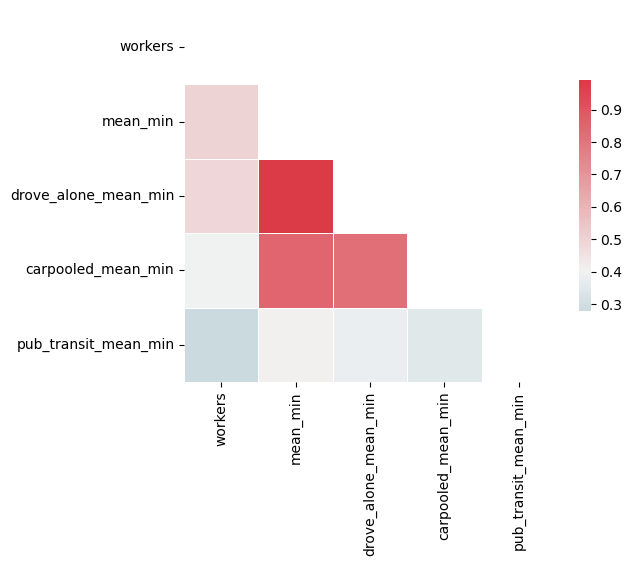

In [7]:
heatmap(avg_comm, center = 0.4)

### The mean travel time is heavily correlated with the mean travel time of those who drive alone! This may be because the vast majority of people who commute drive alone, meaning this group of people has the greatest impact on the overall average travel time.

In [8]:
pattern2 = r'median'
keep = ['workers']

for col in data.columns:
    if re.search(pattern2,col):
        keep.append(col)

In [9]:
avg_age = data[keep].groupby(data.index).mean()
#avg_age

In [10]:
avg_age.corr()

,workers,median_age,drove_alone_median_age,carpooled_median_age,pub_transit_median_age
workers,1.000000,-0.044521,-0.010275,0.155657,-0.024456
median_age,-0.044521,1.000000,0.949674,0.540394,0.274435
drove_alone_median_age,-0.010275,0.949674,1.000000,0.535142,0.209641
carpooled_median_age,0.155657,0.540394,0.535142,1.000000,0.144897
pub_transit_median_age,-0.024456,0.274435,0.209641,0.144897,1.000000


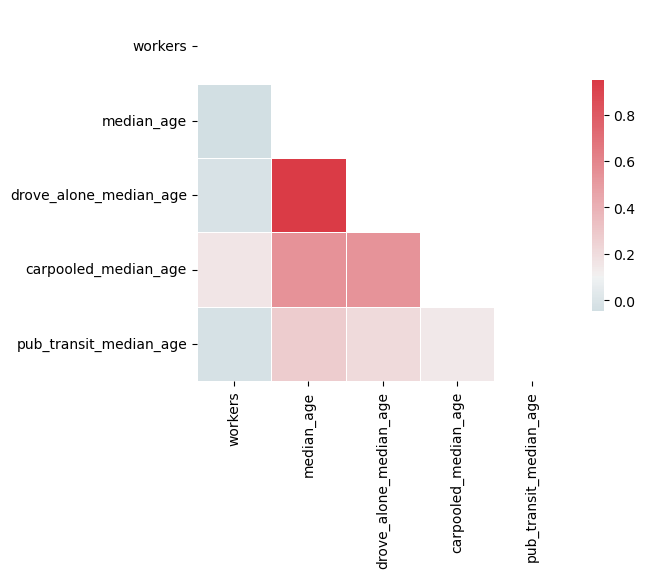

In [11]:
heatmap(avg_age, center = 0.1)

### Likewise, median age is heavily correlated with the median age of those who drive alone.

In [12]:
keep = ['workers']
for col in data.columns:
    if re.search(pattern,col) or re.search(pattern2,col):
        keep.append(col)

In [13]:
data_avg = data[keep]

In [ ]:
data_avg

In [14]:
data_avg.corr()

,workers,mean_min,drove_alone_mean_min,carpooled_mean_min,pub_transit_mean_min,median_age,drove_alone_median_age,carpooled_median_age,pub_transit_median_age
workers,1.000000,0.496159,0.479678,0.371900,0.210865,-0.037159,-0.002281,0.130136,0.024361
mean_min,0.496159,1.000000,0.986326,0.780623,0.343419,0.143736,0.210461,0.303785,0.094601
drove_alone_mean_min,0.479678,0.986326,1.000000,0.731988,0.306231,0.145211,0.214667,0.279458,0.091286
carpooled_mean_min,0.371900,0.780623,0.731988,1.000000,0.251433,0.092948,0.134012,0.317086,0.060986
pub_transit_mean_min,0.210865,0.343419,0.306231,0.251433,1.000000,0.189872,0.137336,0.107343,0.140038
median_age,-0.037159,0.143736,0.145211,0.092948,0.189872,1.000000,0.934663,0.425875,0.217112
drove_alone_median_age,-0.002281,0.210461,0.214667,0.134012,0.137336,0.934663,1.000000,0.387598,0.148312
carpooled_median_age,0.130136,0.303785,0.279458,0.317086,0.107343,0.425875,0.387598,1.000000,0.102593
pub_transit_median_age,0.024361,0.094601,0.091286,0.060986,0.140038,0.217112,0.148312,0.102593,1.000000


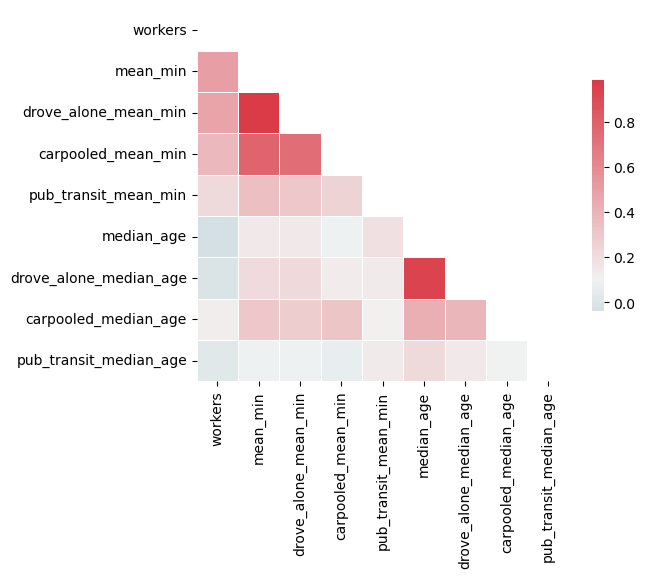

In [15]:
heatmap(data_avg, center = 0.1)

### From this, it looks like there isn't a correlation between age and commute time.

Let's investigate that further.

In [ ]:
age.describe().astype(int)

In [16]:
def heatmap_2(data, category, center = 0.1):
    pattern = re.compile(category)
    keep = ['workers']
    
    for col in data.columns:
        if re.search(pattern,col):
            keep.append(col)
    #end
    
    data = data[keep]
    
    data_corr = data.corr().loc[category+'_age_16_19':category+'_age_60_and_over',
                                category+'_10_min':category+'_60_min']
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    sns.heatmap(data_corr, cmap = cmap, center = center)

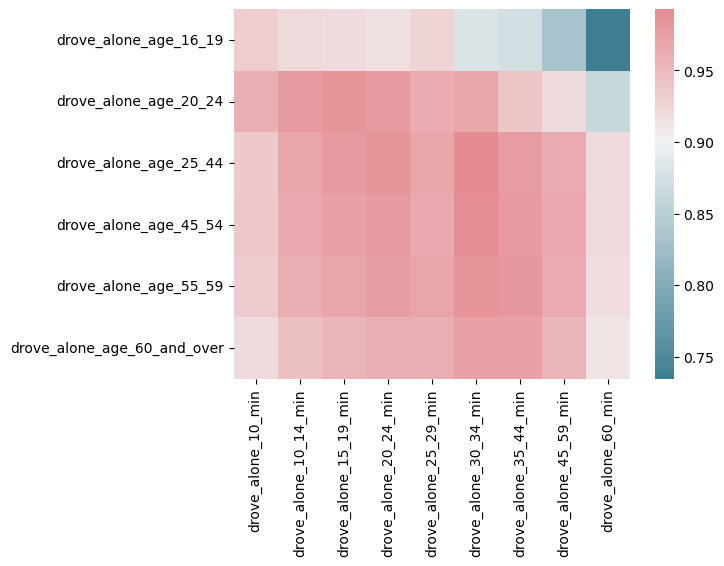

In [17]:
heatmap_2(data,'drove_alone', center = .9)

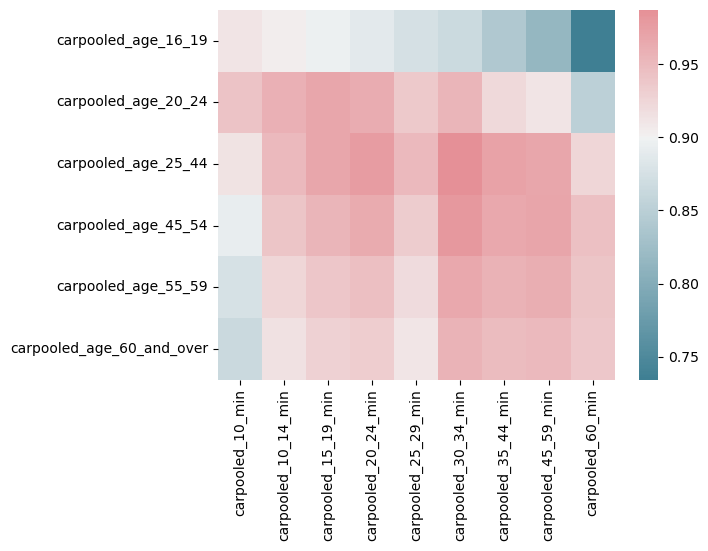

In [18]:
heatmap_2(data,'carpooled',center=0.9)

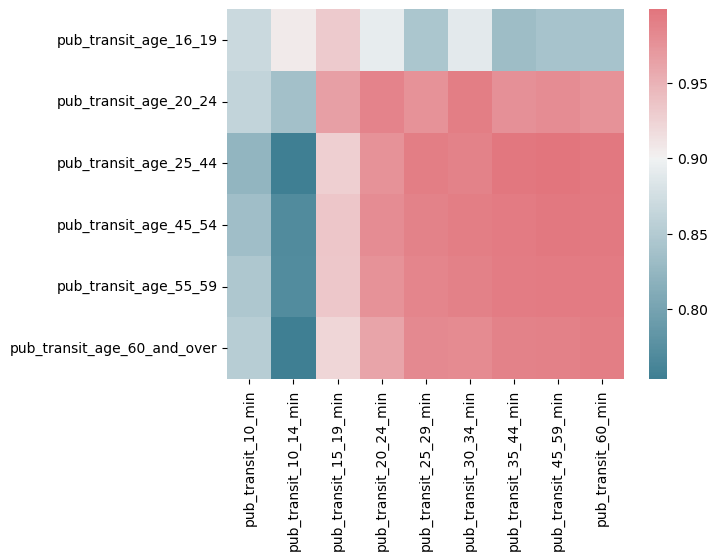

In [19]:
heatmap_2(data,'pub_transit',center=.9)

In [20]:
drove = r'drove_alone'
keep = ['workers']

for col in data.columns:
    if re.search(drove,col):
        keep.append(col)

In [ ]:
data[keep].describe().astype(int)

In [21]:
alone = data[keep]
#alone

In [23]:
alone_corr = alone.corr().loc['drove_alone_age_16_19':'drove_alone_age_60_and_over',
                              'drove_alone_10_min':'drove_alone_60_min']
alone_corr

,drove_alone_10_min,drove_alone_10_14_min,drove_alone_15_19_min,drove_alone_20_24_min,drove_alone_25_29_min,drove_alone_30_34_min,drove_alone_35_44_min,drove_alone_45_59_min,drove_alone_60_min
drove_alone_age_16_19,0.933124,0.920446,0.919721,0.915764,0.926654,0.879637,0.871598,0.831928,0.734553
drove_alone_age_20_24,0.959926,0.979094,0.983180,0.978535,0.962045,0.967255,0.940029,0.919296,0.862303
drove_alone_age_25_44,0.937204,0.967558,0.978847,0.983638,0.969581,0.992848,0.976448,0.964582,0.919318
drove_alone_age_45_54,0.937666,0.964810,0.970805,0.978939,0.965016,0.989674,0.978925,0.966609,0.921976
drove_alone_age_55_59,0.935896,0.960776,0.968001,0.975354,0.968255,0.984669,0.979782,0.964200,0.918923
drove_alone_age_60_and_over,0.919275,0.943968,0.953925,0.961061,0.961196,0.972441,0.971890,0.953894,0.911138


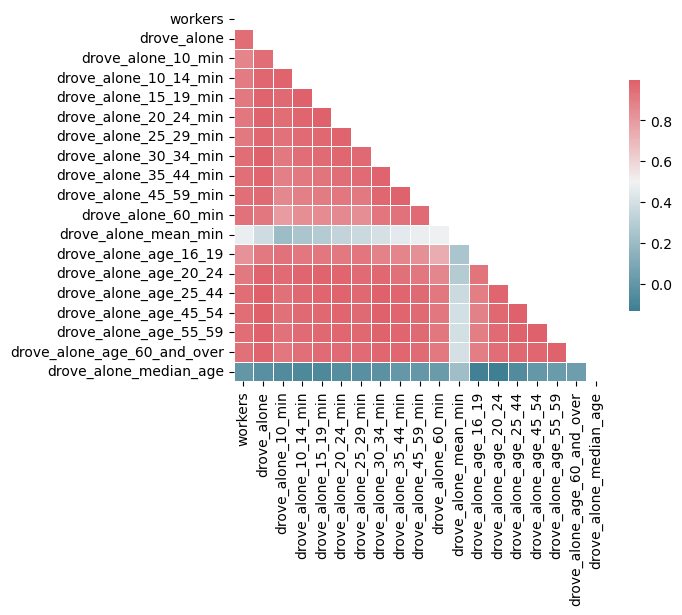

In [22]:
heatmap(alone, center = .5)

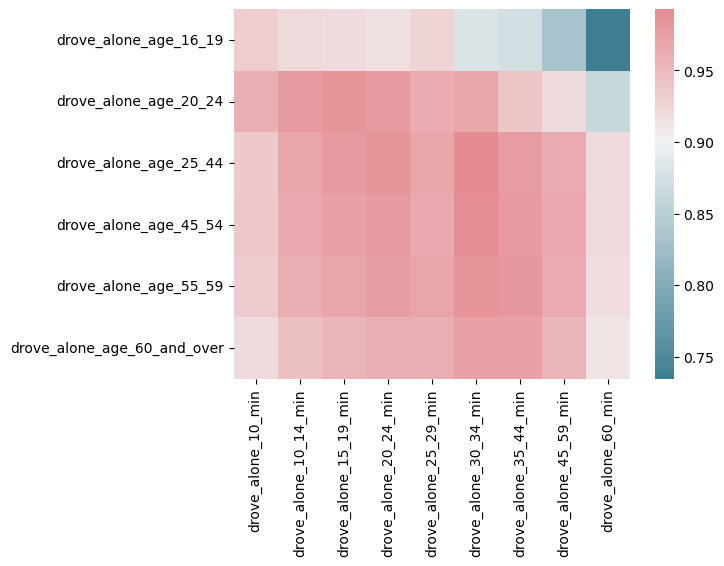

In [24]:
sns.heatmap(alone_corr, cmap = sns.diverging_palette(220, 10, as_cmap=True), center = .9);

In [25]:
drove = r'carpool'
keep = ['workers']

for col in data.columns:
    if re.search(drove,col):
        keep.append(col)
#end

carpool = data[keep]

In [ ]:
carpool

In [ ]:
carpool.corr()

In [26]:
carpool_corr = carpool.corr().loc['carpooled_age_16_19':'carpooled_age_60_and_over',
                              'carpooled_10_min':'carpooled_60_min']
#carpool_corr

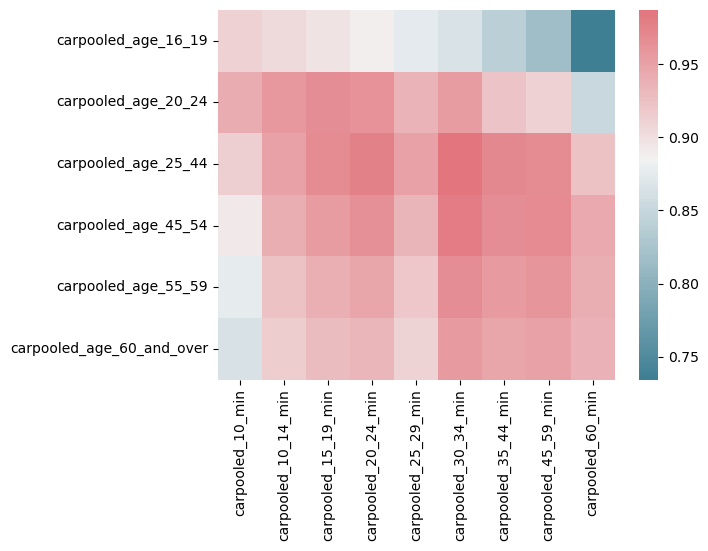

In [27]:
sns.heatmap(carpool_corr, cmap = sns.diverging_palette(220, 10, as_cmap=True), center = .885);

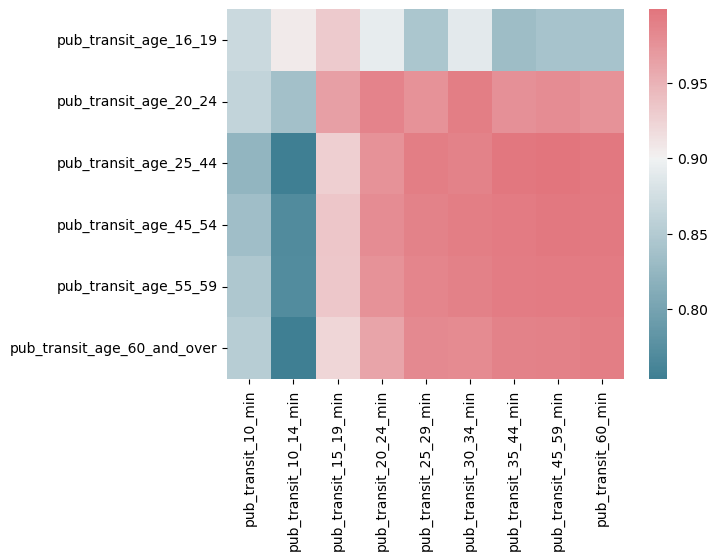

In [28]:
pattern = r'pub_'
keep = ['workers']

for col in data.columns:
    if re.search(pattern,col):
        keep.append(col)
#end

pub_transit = data[keep]

pub_transit_corr = pub_transit.corr().loc['pub_transit_age_16_19':'pub_transit_age_60_and_over',
                                          'pub_transit_10_min':'pub_transit_60_min']
sns.heatmap(pub_transit_corr, cmap = sns.diverging_palette(220, 10, as_cmap=True), center = .9);

In [ ]:
pub_transit_corr

### In the end, it doesn't look like there's a clear correlation between age and commute time.

## Next, I want to see how stats changed over years.

In [29]:
years_avg = data.groupby('year').mean(numeric_only = True).round(2)
years_avg

,workers,drove_alone,carpooled,pub_transit,10_min,drove_alone_10_min,carpooled_10_min,pub_transit_10_min,10_14_min,drove_alone_10_14_min,...,carpooled_age_55_59,pub_transit_age_55_59,age_60_and_over,drove_alone_age_60_and_over,carpooled_age_60_and_over,pub_transit_age_60_and_over,median_age,drove_alone_median_age,carpooled_median_age,pub_transit_median_age
year,,,,,,,,,,,,,,,,,,,,,
2010,229159.27,153617.84,19399.19,12293.05,25003.07,16727.11,1840.32,147.06,30748.28,21947.17,...,1704.44,1212.96,22879.34,18393.76,1697.08,1259.42,41.86,42.50,38.68,37.28
2011,216590.12,148564.79,18665.69,12008.33,23831.42,16283.78,1736.22,157.17,29207.24,21211.46,...,1667.22,1168.80,22436.78,18094.56,1632.84,1195.42,42.04,42.70,38.92,38.07
2012,207761.31,144904.91,18329.55,11486.43,22638.40,15605.76,1726.95,135.00,28010.25,20622.18,...,1617.26,1062.44,22155.75,17787.16,1639.24,1168.64,41.97,42.63,38.45,37.56
2013,221250.47,149538.32,18211.97,12234.95,23595.76,15849.79,1707.86,142.86,29046.74,20817.12,...,1662.76,1229.01,24421.96,19703.29,1748.52,1317.26,41.95,42.60,38.72,36.99
2014,218568.62,151947.27,18248.89,12480.59,23277.60,16019.15,1751.24,146.60,28400.16,20841.93,...,1606.38,1193.05,24722.08,19981.28,1732.42,1324.32,41.91,42.56,38.31,36.44
2015,228286.65,156454.90,18239.21,12885.90,23441.82,15795.35,1783.82,142.94,29199.81,21083.95,...,1638.80,1244.43,26509.95,21483.93,1800.86,1395.18,41.79,42.42,38.36,35.50
2016,240111.12,161382.35,19105.58,13037.06,24272.90,16065.46,1843.05,135.12,30316.63,21419.12,...,1752.52,1320.52,28623.21,23145.19,1962.58,1506.47,41.71,42.38,37.81,36.84
2017,243224.36,169259.27,19712.03,13527.62,24059.07,16365.80,1900.63,134.98,30353.73,22041.53,...,1768.58,1305.48,29999.95,24279.68,1971.86,1613.65,41.68,42.31,38.00,36.62
2018,251928.39,174920.96,20634.47,13821.84,24335.84,16533.01,1971.61,141.56,30679.39,22202.78,...,1767.45,1315.87,31775.64,25802.97,2123.20,1664.83,41.48,42.09,37.77,37.30


In [30]:
pattern  = r'mean'
#pattern2 = r'median'
keep = ['workers']

for col in years_avg.columns:
    if re.search(pattern,col):# or re.search(pattern2,col):
        keep.append(col)
#end

In [31]:
year_times = years_avg[keep]
#year_times

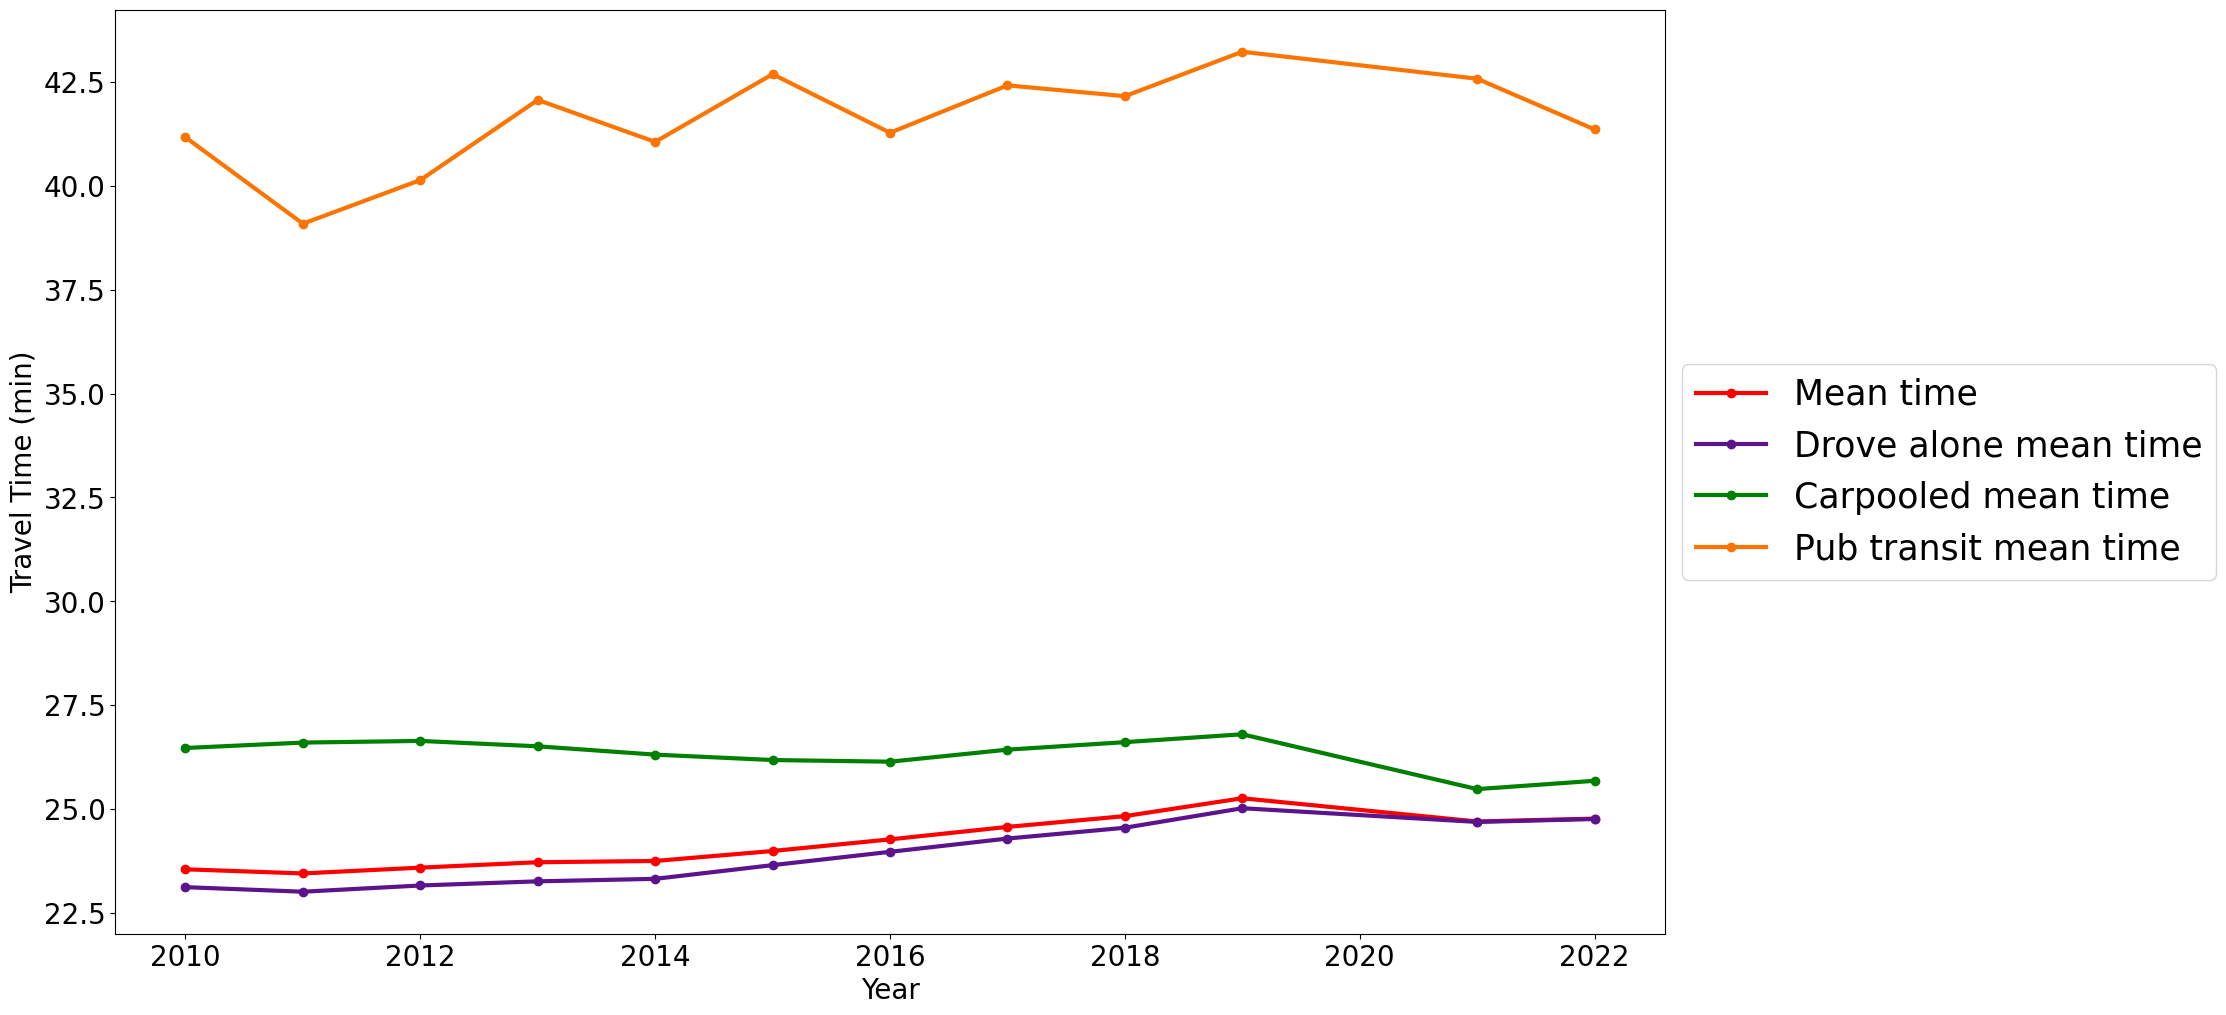

In [60]:
fig, ax = plt.subplots(1, figsize=(20,12))
labels = []
colors = ['r','#5c148c','g','#fd7400']

i = 0
for col in year_times.columns:
    if col != 'workers':
        line, = plt.plot(year_times[col], marker='o', label = str.capitalize(col.replace('_',' ').replace('min','time')),
                         linewidth = 3, color = colors[i])
        plt.legend(handles = [plt.plot([],ls="-", color=line.get_color())[0]],
                   labels=[line.get_label()])
        i += 1
#end

plt.xlabel('Year', size = 20)
plt.ylabel('Travel Time (min)', size = 20)
ax.legend(labels = labels, handles  = "-", 
          fontsize = 25, loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis = 'both', labelsize = 20);
# help from: https://stackoverflow.com/questions/48391146/change-marker-in-the-legend-in-matplotlib

In [33]:
pattern2 = r'median'
keep = ['workers']

for col in years_avg.columns:
    if re.search(pattern2,col):
        keep.append(col)
#end

year_ages = years_avg[keep]

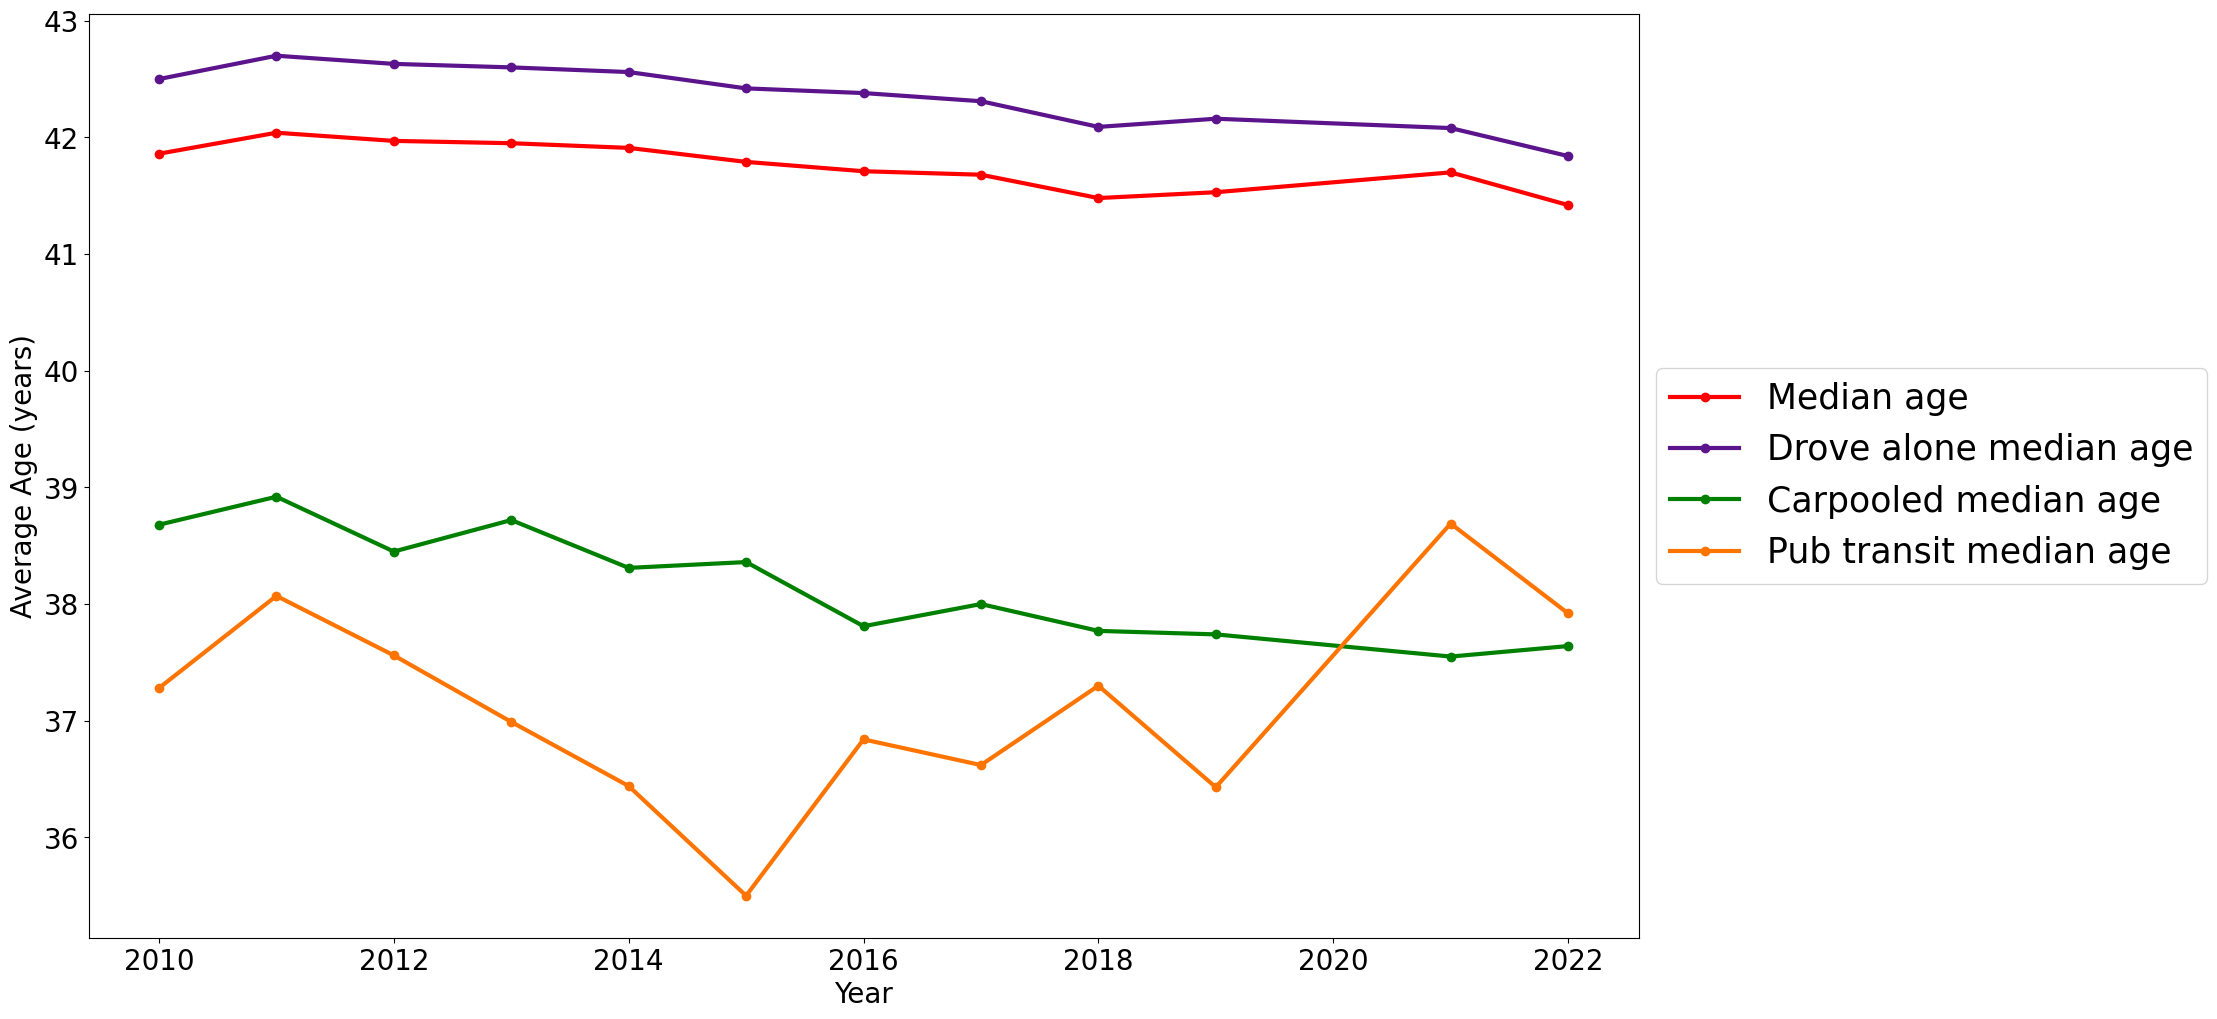

In [61]:
fig, ax = plt.subplots(1, figsize=(20,12))

i = 0
for col in year_ages.columns:
    if col != 'workers':
        line, = plt.plot(year_ages[col], marker='o', label = str.capitalize(col.replace('_',' ').replace('min','time')),
                         linewidth = 3, color = colors[i])
        plt.legend(handles = [plt.plot([],ls="-", color=line.get_color())[0]],
                   labels=[line.get_label()])
        i += 1
#end

plt.xlabel('Year', size = 20)
plt.ylabel('Average Age (years)', size = 20)
ax.legend(labels = labels, handles  = "-", 
          fontsize = 25, loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis = 'both', labelsize = 20);
# help from: https://stackoverflow.com/questions/48391146/change-marker-in-the-legend-in-matplotlib

In [38]:
counties = []
states = []

for county in data.index:
    county_name = county.split(', ')[0]
    state       = county.split(', ')[1]
    counties.append(county_name)
    states.append(state)
#end

In [39]:
data['county_name'] = counties
data['state'] = states

In [ ]:
#data.insert(len(data.columns)-1, data.pop('state'), states)

In [40]:
data

,workers,drove_alone,carpooled,pub_transit,10_min,drove_alone_10_min,carpooled_10_min,pub_transit_10_min,10_14_min,drove_alone_10_14_min,...,pub_transit_age_55_59,age_60_and_over,drove_alone_age_60_and_over,carpooled_age_60_and_over,pub_transit_age_60_and_over,median_age,drove_alone_median_age,carpooled_median_age,pub_transit_median_age,county_name
county,,,,,,,,,,,,,,,,,,,,,
"Calhoun County, Alabama",NaN,38242,4003,136,NaN,5545.0,340.0,0.0,NaN,7151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Calhoun County
"Houston County, Alabama",49736.0,45459,3365,113,7311.0,6818.0,299.0,0.0,10742.0,9773.0,...,0.0,4874.0,4364.0,232.0,0.0,42.9,43.2,39.2,35.8,Houston County
"Jefferson County, Alabama",342821.0,298194,36354,2573,24683.0,19978.0,2835.0,0.0,39767.0,34888.0,...,118.0,34282.0,31310.0,1963.0,192.0,42.1,42.5,37.5,41.3,Jefferson County
"Lee County, Alabama",52066.0,40828,7187,478,10204.0,7430.0,1157.0,0.0,10152.0,8247.0,...,0.0,3800.0,2898.0,517.0,0.0,37.1,38.5,32.9,20.8,Lee County
"Madison County, Alabama",190460.0,167379,17905,776,18093.0,16068.0,1593.0,45.0,22283.0,19248.0,...,34.0,20188.0,18244.0,1611.0,0.0,42.6,43.2,38.5,38.1,Madison County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Ellis County, Texas",63500.0,54541,6841,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7302.0,6544.0,738.0,NaN,40.9,40.2,38.0,NaN,Ellis County
"Grayson County, Texas",51918.0,41969,6395,416,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,9345.0,8141.0,569.0,416.0,42.1,42.4,34.7,NaN,Grayson County
"St. Croix County, Wisconsin",36442.0,32750,2350,38,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4773.0,4421.0,242.0,0.0,41.2,40.2,35.9,NaN,St. Croix County


In [ ]:
#data.to_csv('../data/cleaned_data/merged.csv')

In [49]:
work = data.groupby('year')['workers'].sum().to_frame()
work

,workers
year,
2010,99225964.0
2011,102230536.0
2012,106581551.0
2013,107085228.0
2014,109940018.0
2015,111403884.0
2016,111171450.0
2017,113099328.0
2018,113619705.0


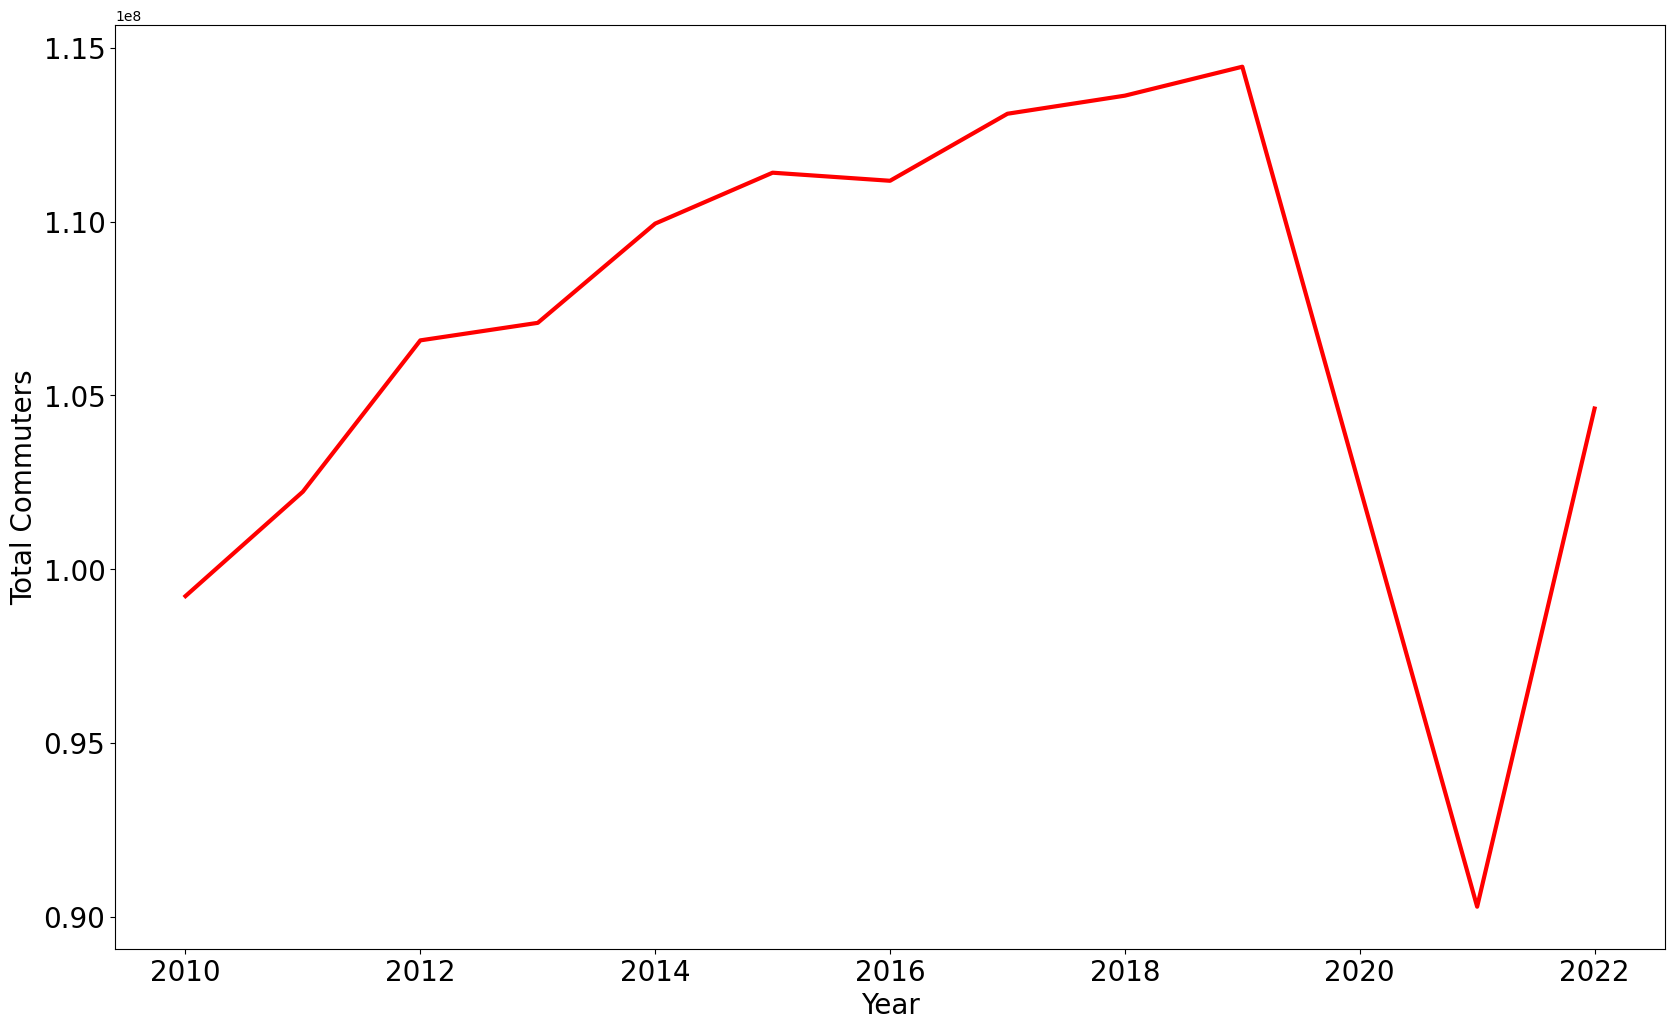

In [54]:
fig, ax = plt.subplots(1, figsize=(20,12))

sns.lineplot(x = work.index, y = work.workers, linewidth = 3, color = 'r')

plt.xlabel('Year', size = 20)
plt.ylabel('Total Commuters', size = 20)
ax.tick_params(axis = 'both', labelsize = 20);